In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

In [ ]:
# Plot MonoLLM Errors

In [104]:
# Generate a plot of MAP from the results in results_csv
def map_plot(results_csv_file, config, title="", baseline=False, max_y=1, cis=True, n_items=100):
    folder_path = "./"
    num_turns = config['dialogue_sim']['num_turns']
    results_df = pd.read_csv(results_csv_file)

    # Set up colours
    # import pdb; pdb.set_trace()
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(results_df))]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.title(title)
    
    for row_num in range(len(results_df)):
        row_maps = []
        upper_bounds = []
        lower_bounds = []
        for turn in range(num_turns):
            row_maps.append(results_df.loc[row_num, 'map@%d' % turn])
            upper_bounds.append(results_df.loc[row_num, 'map@%d_ub' % turn])
            lower_bounds.append(results_df.loc[row_num, 'map@%d_lb' % turn])

        plt.plot(np.linspace(1,num_turns,num_turns), row_maps, marker="o", linestyle="solid", color=colors[row_num], label=results_df.loc[row_num, 'Experiment Name'])
        if cis:
            plt.plot(np.linspace(1,num_turns,num_turns), upper_bounds, marker=".", linestyle="--", color=colors[row_num], label=results_df.loc[row_num, 'Experiment Name'])
            plt.plot(np.linspace(1,num_turns,num_turns), lower_bounds, marker=".", linestyle="--", color=colors[row_num], label=results_df.loc[row_num, 'Experiment Name'])
            plt.fill_between(np.linspace(1,num_turns,num_turns), upper_bounds, lower_bounds, color=colors[row_num], alpha=.1)

    # Temporary - can make a function argument later
    if baseline:
        num_items = n_items
        num_recs = 10
        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        #print(total_maps)
        plt.axhline(y=total_maps, color="r", linestyle="--")

    experiment_names = results_df['Experiment Name'].to_list()
    # experiment_names = sorted(experiment_names)
    for i in range(len(experiment_names)): # Trim experiment names to just the last directory name
        head, tail = os.path.split(experiment_names[i])
        experiment_names[i] = tail

    # Set axis labels
    plt.xticks(np.arange(1, num_turns+1, step=1))
    plt.ylabel('MAP')
    plt.xlabel('Turn #')

    # Create a legend
    handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(results_df))]
    plt.legend(handles, [exp_name for exp_name in experiment_names], title='Experiments')

    plt.ylim(0,max_y)

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    file_path = os.path.dirname(results_csv_file)
    file_name = os.path.join(file_path, "MAP_plot.png")
    fig.savefig(file_name)

    plt.show()

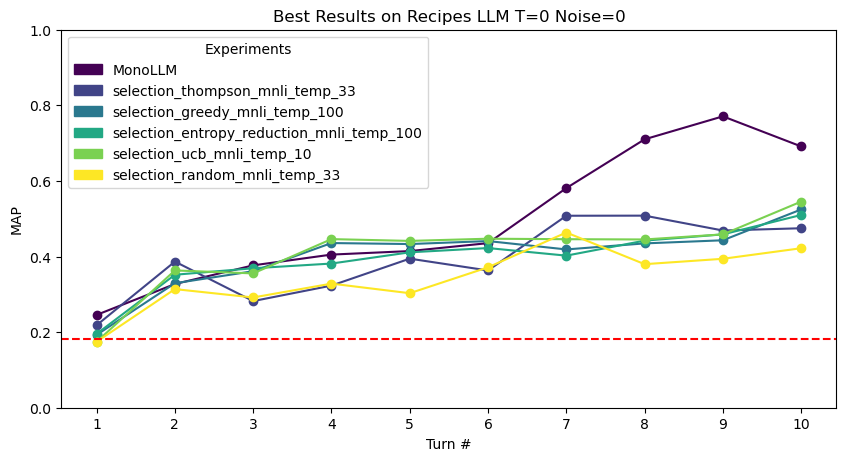

In [107]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/jan_17_yelp_llm0_noise0/aggregated_results.csv"

map_plot(results_csv_file, config, "Best Results on Recipes LLM T=0 Noise=0", baseline=True, cis = False, n_items = 16, max_y=1)

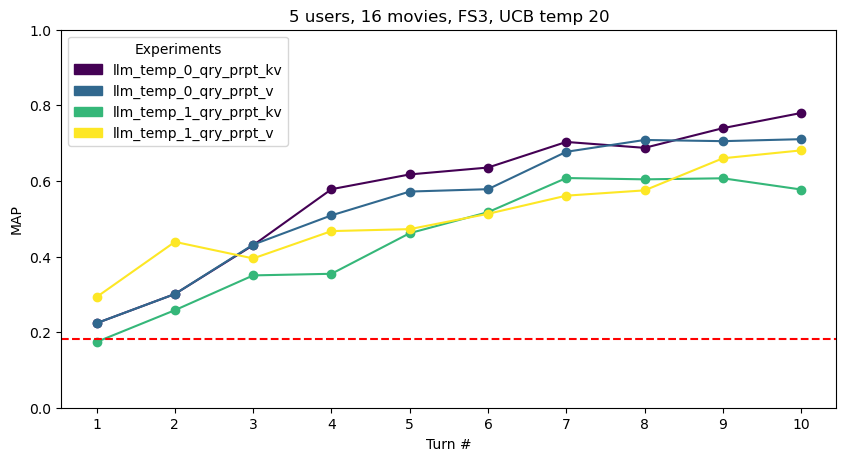

In [46]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/jan_16_value_query_ucb20/aggregated_results.csv"

map_plot(results_csv_file, config, "5 users, 16 movies, FS3, UCB temp 20", baseline=True, cis = False)

0.02928968253968254


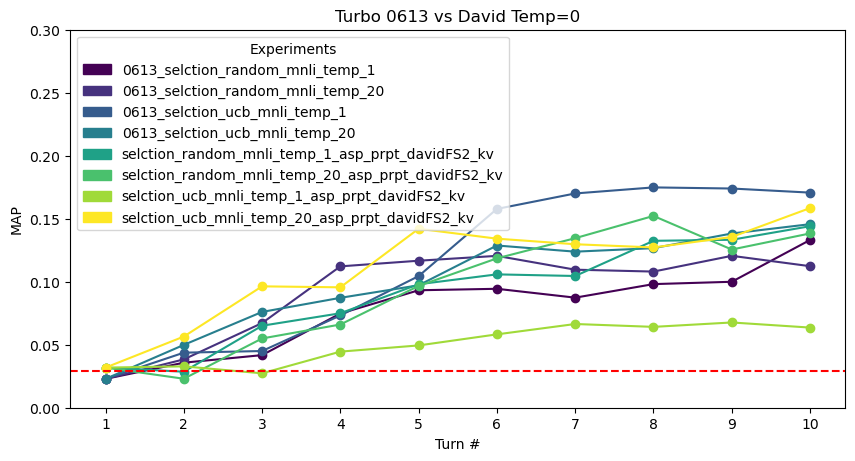

In [31]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/z_compare_file/aggregated_results.csv"

map_plot(results_csv_file, config, "Turbo 0613 vs David Temp=0", baseline=True, max_y=0.3, cis = False)

0.02928968253968254


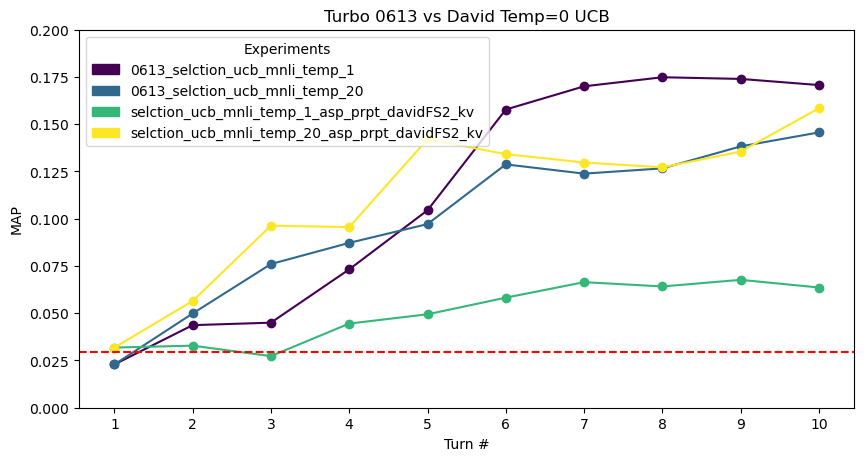

In [36]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/z_compare_file2/aggregated_results.csv"

map_plot(results_csv_file, config, "Turbo 0613 vs David Temp=0 UCB", baseline=True, max_y=0.2, cis = False)

0.05857936507936508


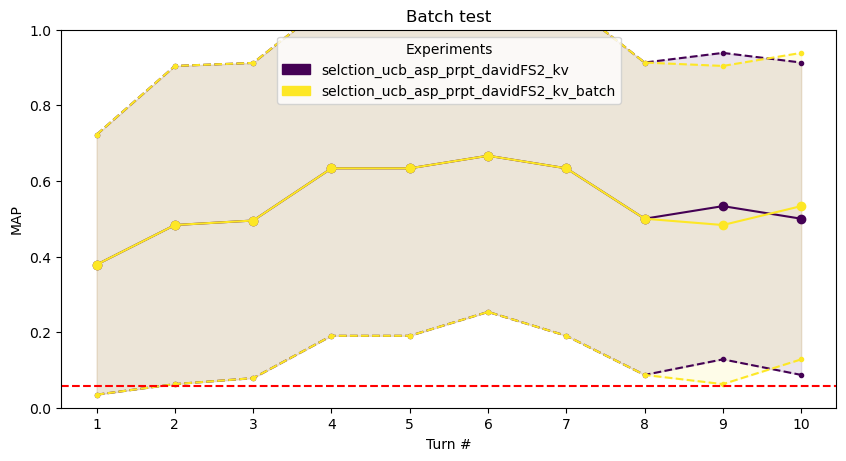

In [19]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/jan_15_batch_tests/aggregated_results.csv"

map_plot(results_csv_file, config, "Batch test", baseline=True)

0.02928968253968254


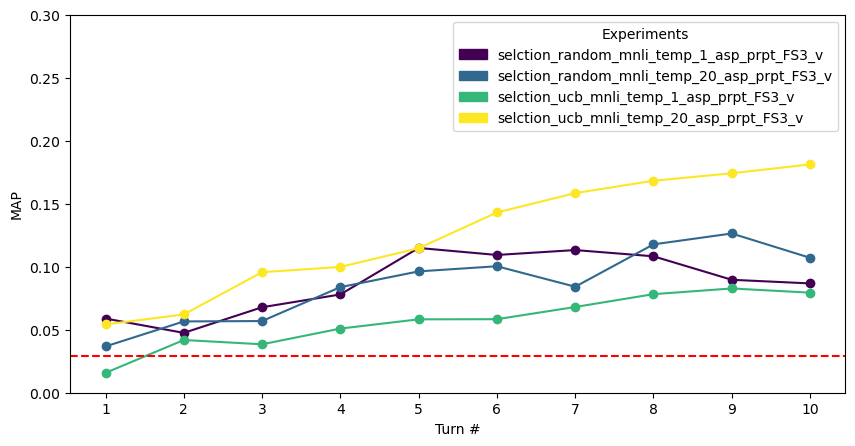

In [18]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/jan_14_llm_temp_1_aspect_value/aggregated_results.csv"

map_plot(results_csv_file, config, "", baseline=True, max_y=0.3, cis=False)

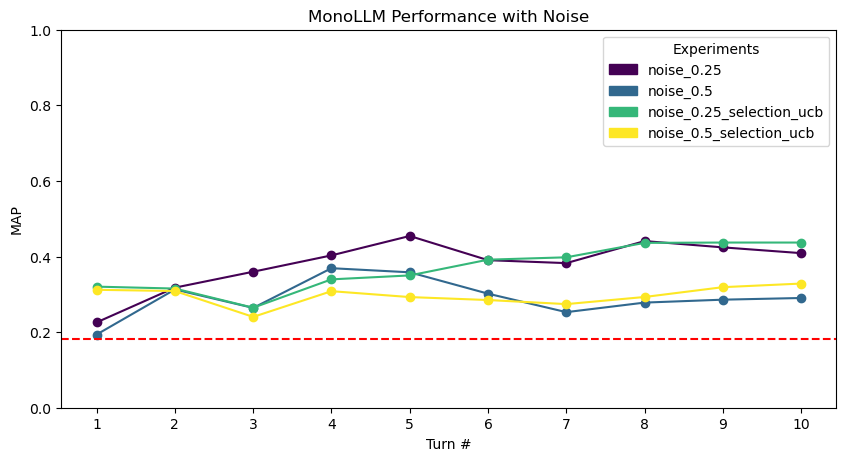

In [51]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/z_compare_file2/aggregated_results.csv"

map_plot(results_csv_file, config, "MonoLLM Performance with Noise", baseline=True, max_y=1.0, cis=False, n_items=16)

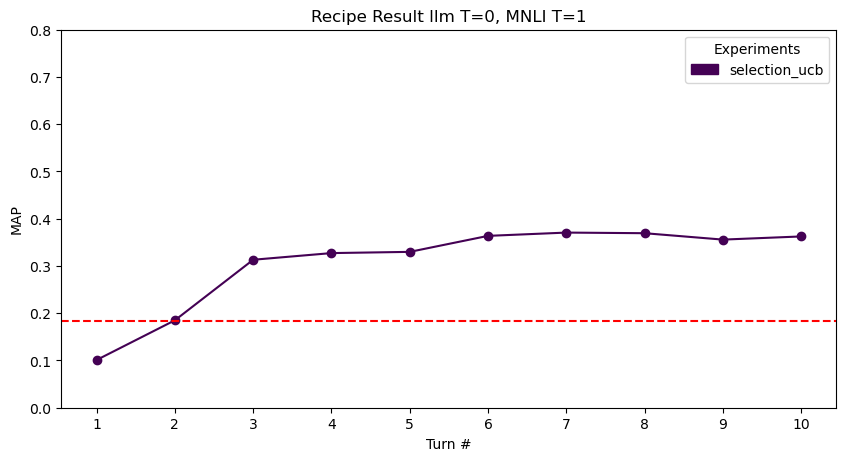

In [44]:
config = {'dialogue_sim': {'num_turns': 10}}
results_csv_file = "experiments/jan_16_recipe_first_run/aggregated_results.csv"

map_plot(results_csv_file, config, "Recipe Result llm T=0, MNLI T=1", baseline=True, max_y=0.8, cis=False, n_items=16)